In [226]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Data analysis

In [227]:
df = pd.read_csv('train.csv')
df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [228]:
df.drop(['store', 'product'], axis = 1, inplace = True)

print(df.shape)
df.head()

(230090, 2)


,Date,number_sold
0,2010-01-01,801
1,2010-01-02,810
2,2010-01-03,818
3,2010-01-04,796
4,2010-01-05,808


In [229]:
df.dtypes

Date           object
number_sold     int64
dtype: object

In [230]:
df.isna().sum()

Date           0
number_sold    0
dtype: int64

In [231]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

df.head()

,Date,number_sold
0,2010-01-01,801
1,2010-01-02,810
2,2010-01-03,818
3,2010-01-04,796
4,2010-01-05,808


Так как были удалены столбцы магазина и товаров, то следует проссумировать количество продаж по дням.

In [232]:
df.index = df['Date']
df.drop('Date', axis=1, inplace=True)

df.dtypes

number_sold    int64
dtype: object

In [233]:
df = df.resample(rule='D').sum()
df.head()

,number_sold
Date,
2010-01-01,54870
2010-01-02,54960
2010-01-03,54863
2010-01-04,54926
2010-01-05,54634


# Visualization

### Скользящее среднее - год

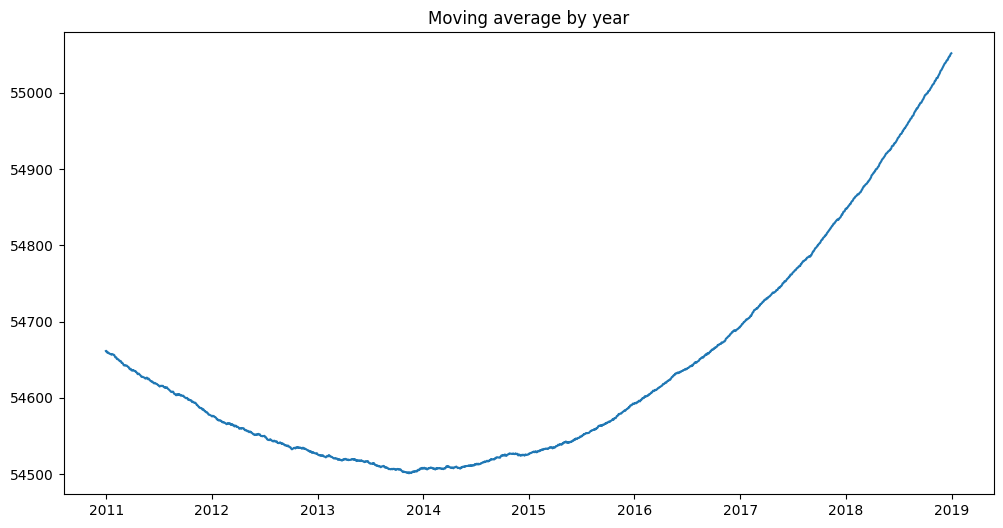

In [234]:
plt.figure(figsize=(12, 6))
plt.plot(df.rolling(window=365).mean())
plt.title('Moving average by year')
plt.show()

### Скользящее среднее - месяц

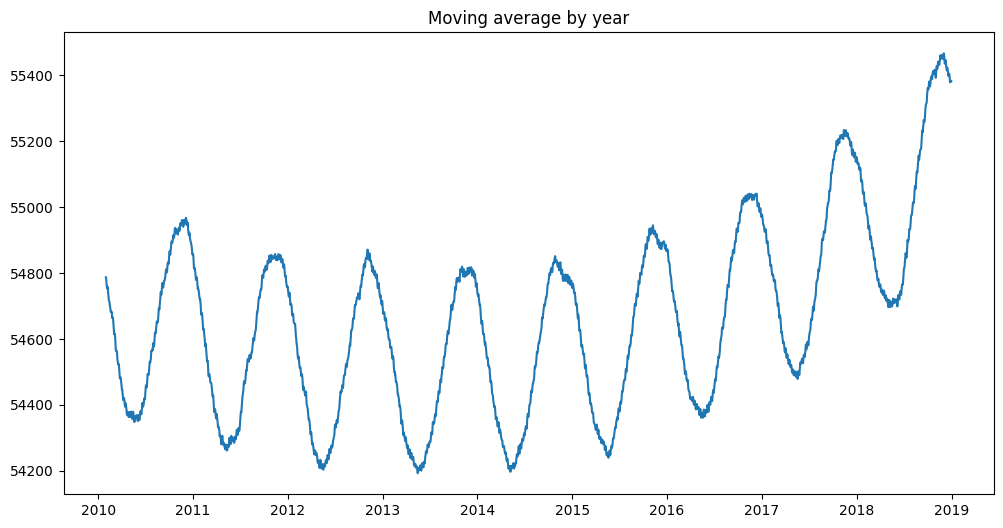

In [235]:
plt.figure(figsize=(12, 6))
plt.plot(df.rolling(window=31).mean())
plt.title('Moving average by year')
plt.show()

По графикам видно, что с течением времени среднее значение ряда меняется, наблюдаются тренды, следовательно, ряд нестационарный. 

### Проверка ряда на стационарность



Тест Дики Фуллера

In [236]:
from statsmodels.tsa.stattools import adfuller

p_val = adfuller(df)[1]
print(p_val)

0.10779573173606494


p-value > 0.05, ряд нестационарен, значит, для прогнозирования нужно учитывать корреляцию переменных